Build a regression model.

In [1]:
# imports
import statsmodels.api as sm
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
full_df = pd.read_csv('../data/bike_stations_barcelona_full_poi1.csv', index_col=0)



In [7]:
full_df.head()

,empty_slots,free_bikes,station_id,latitude,longitude,station_name,poi_id,poi_name,review_count,rating,price,distance,full_address
0,23,8,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",J1vHLZvSRfkNpy2x8OuVaQ,Torre Rosa,21.0,4.0,2,501.236274,"['Carrer de Francesc Tàrrega, 22', '08027 Barc..."
1,23,8,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",oD9g3jw6UoebuiI3GtSGww,Tasca I Vins,10.0,4.0,1,191.557179,"['Calle Cardenal Tedeschini, 32', '08027 Barce..."
2,23,8,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",iRrsa0bQbTtHzBjsHIprqQ,Beering Barcelona,10.0,4.5,1,828.625543,"['Carrer de las Navas de Tolosa, 355', '08041 ..."
3,23,8,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",e6bRub-8J0j5PDm55UNASA,Toca Teca,3.0,4.5,1,395.734907,"['Carrer Garcilaso, 172', '08027 Barcelona', '..."
4,23,8,dedcd93fbe85671e73c79baf58bd7fed,41.425364,2.185207,"C/ CARDENAL TEDESCHINI, 13",UdRmo2dstOYd29Ihs5vI8w,La Vermuteria de Sant Andreu,4.0,4.0,2,508.573281,"['Rambla de Fabra I Puig, 51', '08030 Barcelon..."


In [8]:
grouped_by_station = full_df[['station_id', 'empty_slots','free_bikes','review_count', 'rating', 'price']].groupby(by='station_id').mean()

grouped_by_station.head()

,empty_slots,free_bikes,review_count,rating,price
station_id,,,,,
00028670e3d01438515caba403ffd680,12.0,8.0,18.800000,4.000000,1.600000
00341b8b54545c560fdec7d7983f9f5a,25.0,14.0,NaN,NaN,0.000000
00565dda9629be93f8f69358b48602cc,8.0,17.0,383.125000,4.062500,1.750000
006395fd7434c1f65d20cf0a1b0c94f0,15.0,8.0,NaN,NaN,0.000000
00e4814116fc414fb00b93cc1c9aa1ca,18.0,9.0,9.555556,4.277778,1.555556


In [9]:
grouped_by_station.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 00028670e3d01438515caba403ffd680 to ffbaa273abd20a25367fc85ccfd7330c
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   empty_slots   505 non-null    float64
 1   free_bikes    505 non-null    float64
 2   review_count  145 non-null    float64
 3   rating        145 non-null    float64
 4   price         505 non-null    float64
dtypes: float64(5)
memory usage: 23.7+ KB


In [10]:
# filling with 0 the two bike stations without any poi
grouped_by_station[['review_count', 'rating']] = grouped_by_station[['review_count', 'rating']].fillna(0)

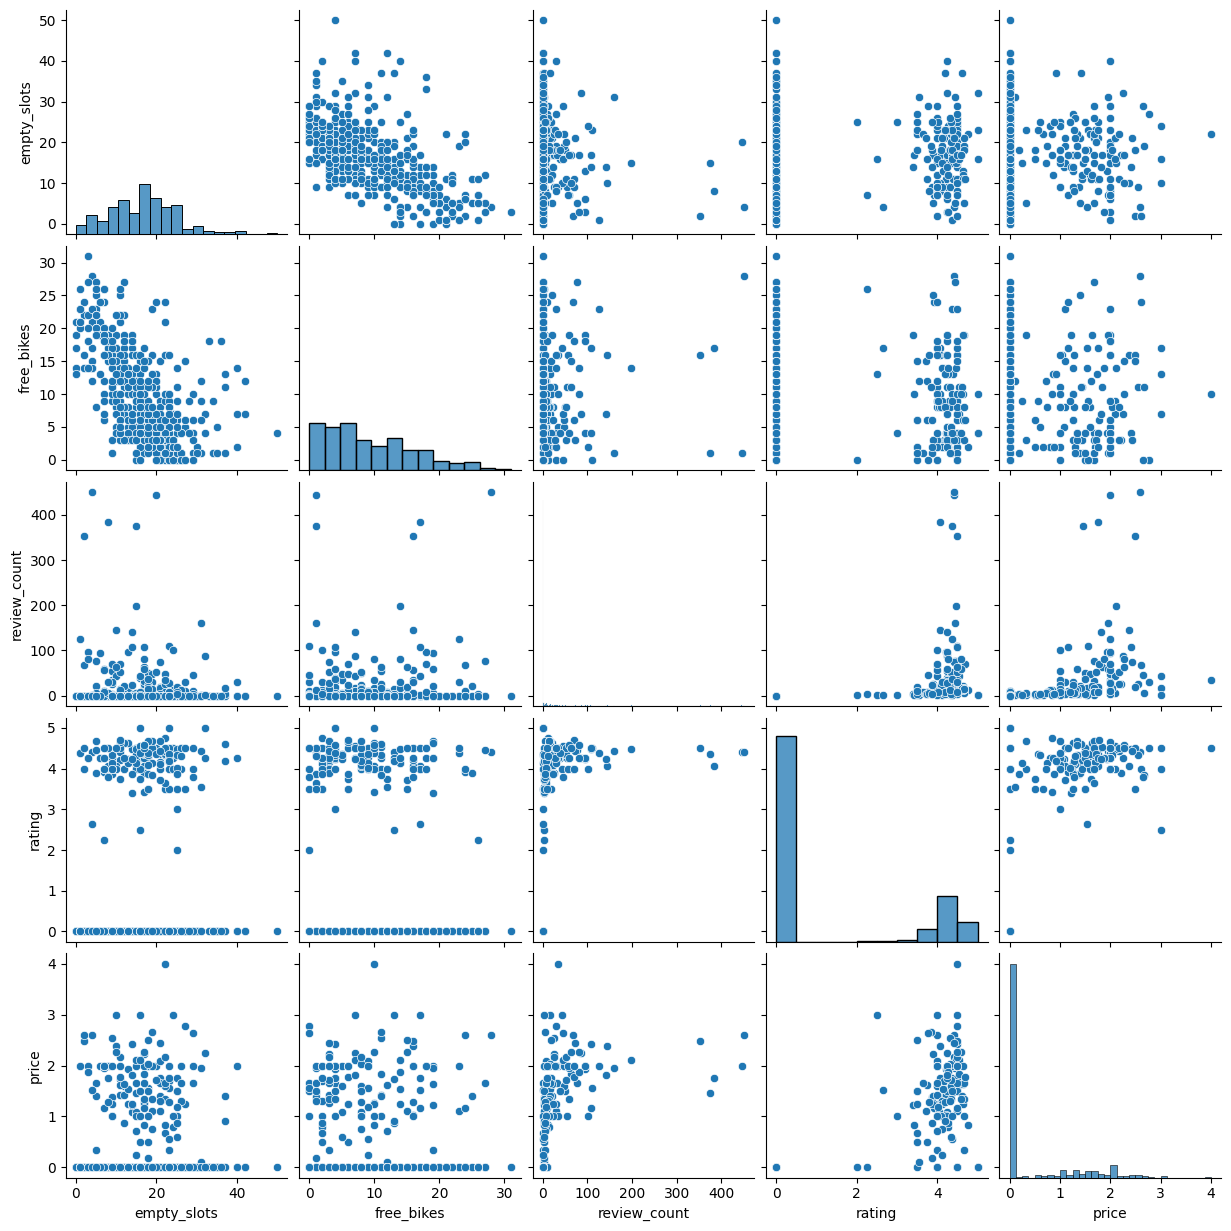

In [11]:
sns.pairplot(data=grouped_by_station)
plt.show()

Provide model output and an interpretation of the results. 

In [12]:
y = grouped_by_station['free_bikes']
X = grouped_by_station[['review_count', 'rating', 'price']]
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept
X.head()

,const,review_count,rating,price
station_id,,,,
00028670e3d01438515caba403ffd680,1.0,18.800000,4.000000,1.600000
00341b8b54545c560fdec7d7983f9f5a,1.0,0.000000,0.000000,0.000000
00565dda9629be93f8f69358b48602cc,1.0,383.125000,4.062500,1.750000
006395fd7434c1f65d20cf0a1b0c94f0,1.0,0.000000,0.000000,0.000000
00e4814116fc414fb00b93cc1c9aa1ca,1.0,9.555556,4.277778,1.555556


In [13]:
model = sm.OLS(y, X) #instantiate
results = model.fit() #fit the model (this is where OLS is actually being run)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.208
Date:                Sun, 10 Dec 2023   Prob (F-statistic):             0.0863
Time:                        17:11:25   Log-Likelihood:                -1679.7
No. Observations:                 505   AIC:                             3367.
Df Residuals:                     501   BIC:                             3384.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            9.5221      0.356     26.783   

# Stretch

How can you turn the regression model into a classification model?